In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import os 
from datetime import datetime
%matplotlib inline

In [2]:
rates = pd.read_csv('foreign_exchange_rates.csv')
rates.drop('Unnamed: 0', axis = 1, inplace = True)
rates.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


# Вопросы
1. В какой валюте выгоднее всего держать деньги? 
2. В какой валюте не стоит хранить деньги?
3. Влияют ли валюты как то на друг друга? 
4. Какая наиболее не стабильна?
5. Какая валюта возрастает больше всего, какая остается без изменений, какая падает?

# Ответы
1. График №1 показывает как цена доллара менялась в течении 20 лет. Если график возрастает значит цена доллара увеличивается и в этой валюте не стоит хранить деньги. Хранить деньги можно в тех валютах которые либо стабильны либо возрастают по отношению к доллару. Я бы советовал хранить в этих валютах: AUSTRALIAN DOLLAR, EURO, NEW ZELAND DOLLAR,CANADIAN DOLLAR,SINGAPORE DOLLAR, DANISH KRON, FRANC, HONG KONG DOLLAR(постоянно меняется, но они совсем не большие). Все они относительно стабильны и за последние 20 лет либо не сильно изменились либо прибавили в цене. 
2. Я бы не советовал хранить деньги в:  BRAZIL - REAL, INDIAN RUPEE, MEXICAN PESO, RAND, SRI LANKAN RUPEE
3. Да валюты влияют друг на друга можно посмотреть на график №3. Некоторые очень сильно зависят друг от друга(более 0.8). К  примеру AUSTRALIAN DOLLAR очень зависит от Канадского доллара, Евро, Ново-Зеландского доллара, также чуть меньше но коррелирует с Швецией, Данией, Сингапуром и тд. Практически никак не зависит от Рупи или Песо. 
4. Гонконгский Доллар. Когда другие валюта сильно падают или сильно поднимаются, эта валюта за 20 лет поменялась лишь в радиусе 7.70-7.85. 
5. ```Выросли```: NEW ZELAND DOLLAR,SINGAPORE DOLLAR,FRANC. ```Без изменений```: AUSTRALIAN DOLLAR, CANADIAN DOLLAR,HONG KONG DOLLAR,JAPAN - YEN, если посмотреть на график №2, то их значения в основном были в одном радиусе за этот период времени.    ```Упали```: SOUTH AFRICA - RAND INDIAN RUPEE MEXICAN PESO BRAZIL - REAL

In [12]:
clean_rates = rates.replace('ND', np.nan)
clean_rates.iloc[:,1:] = clean_rates.iloc[:,1:].apply((lambda x: x.astype('float64')))
clean_rates.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

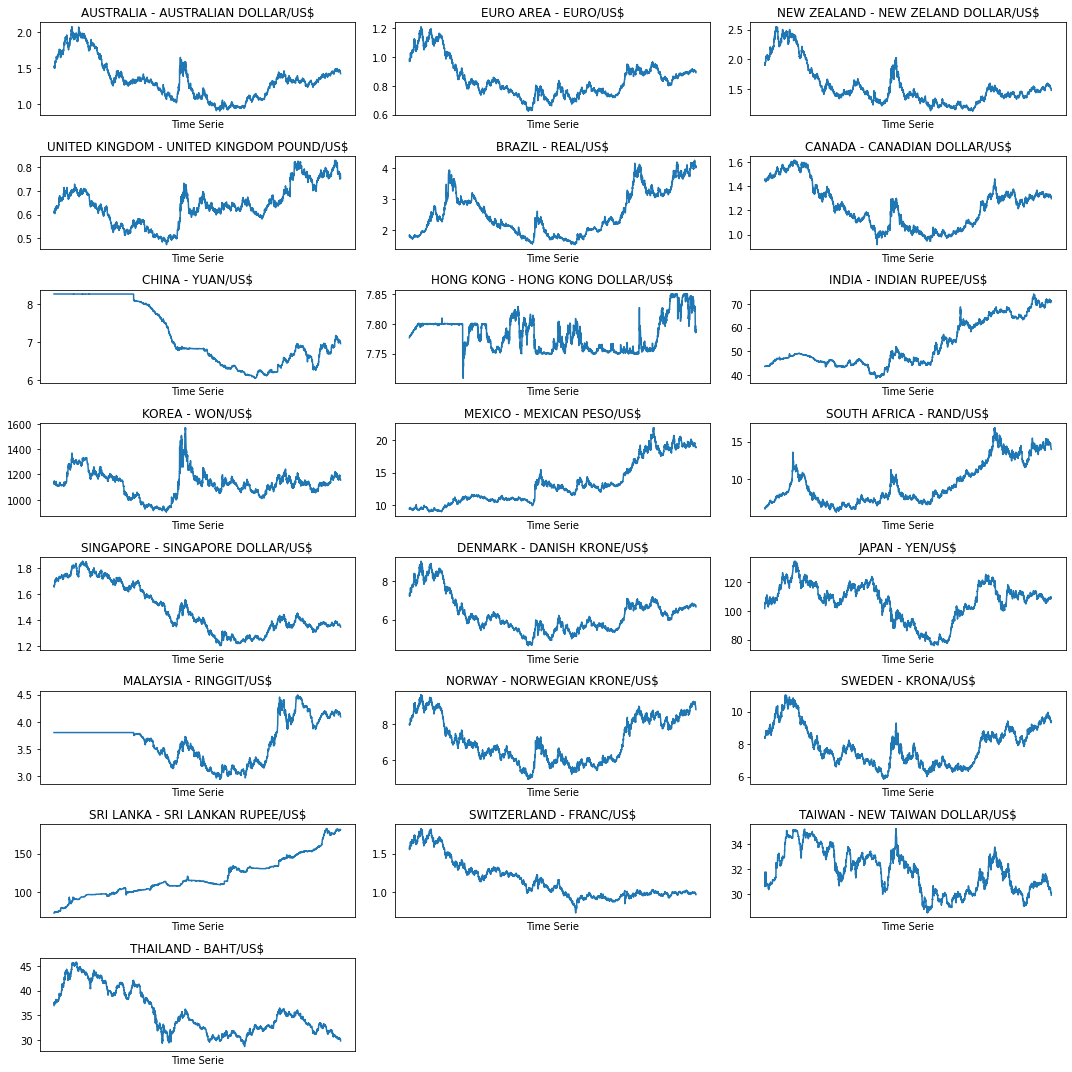

In [13]:
# График №1
plt.figure(figsize = (15,15))
for i, j  in enumerate(clean_rates.columns[1:23], 1):
    ax = plt.subplot(8,3,i)
    sns.lineplot(clean_rates['Time Serie'] , clean_rates[j].astype('float64'), ax = ax)
    plt.xticks([])
    plt.ylabel('')
    plt.title(j)
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

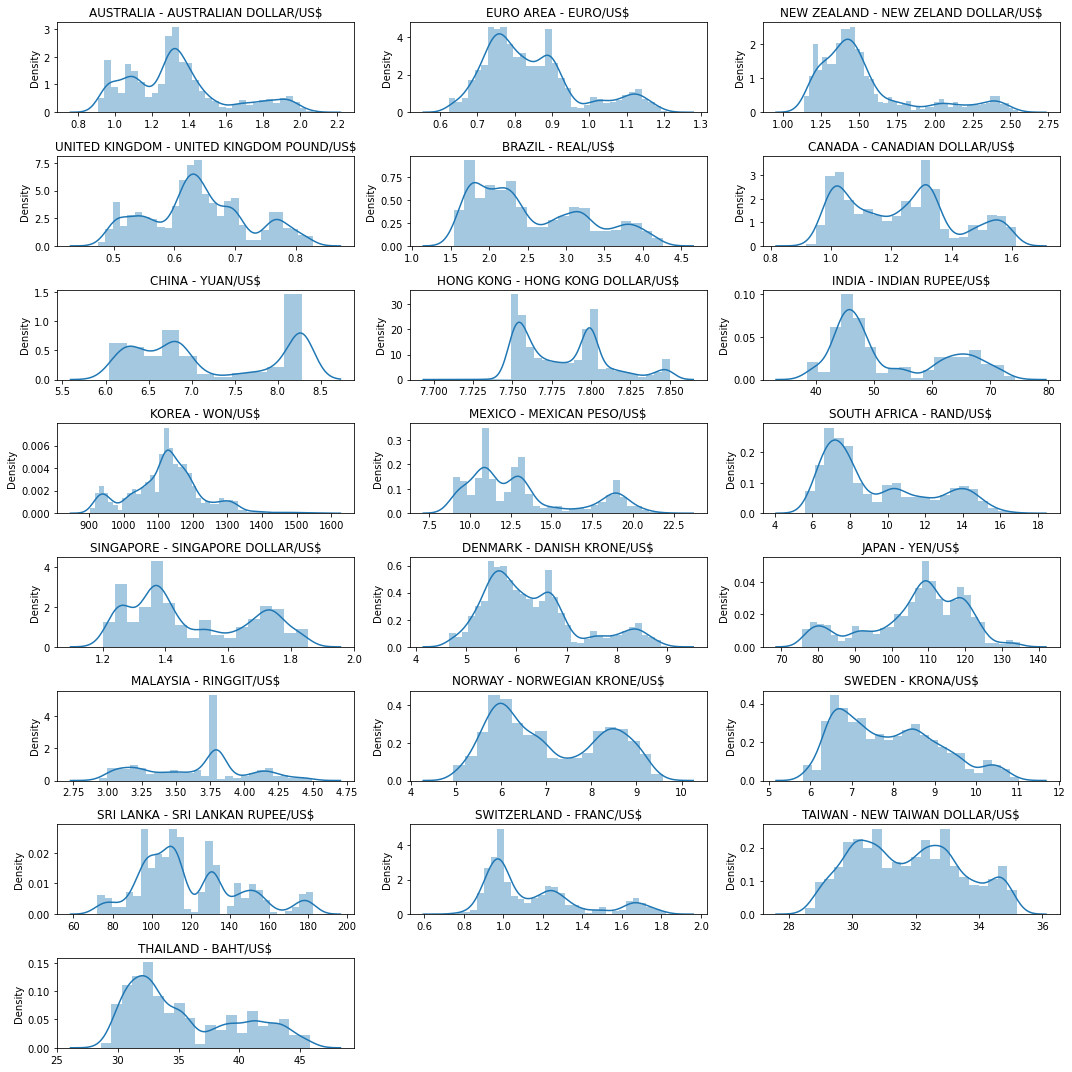

In [14]:
# График №2
plt.figure(figsize = (15,15))
for i, j  in enumerate(clean_rates.columns[1:23],1):
    ax = plt.subplot(8,3,i)
    sns.distplot(x = clean_rates[j])
    plt.title(j)
plt.tight_layout()

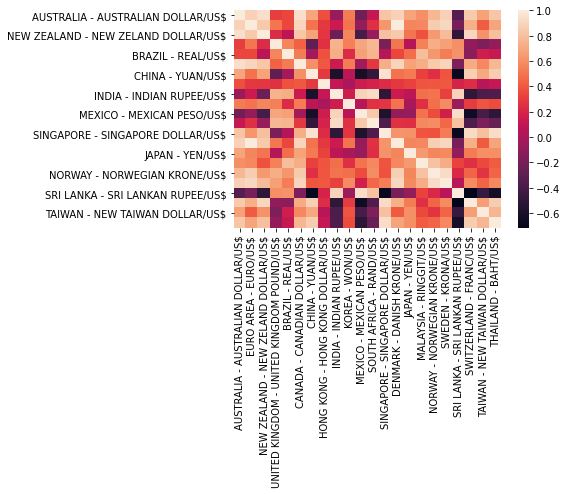

In [15]:
# График №3
corr = clean_rates.iloc[:,1:].astype('float64').corr()
sns.heatmap(corr);